<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [21]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [6]:
# Read CSV
house_csv = "Sacramento_realestate_transactions.csv"
house = pd.read_csv("C:/Users/Monica/Desktop/IoD-Folders/MODULE 4/Labs/Sacramento_realestate_transactions.csv")

In [52]:
house.shape

(985, 12)

In [53]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [54]:
# Tail
house.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [55]:
# Check Null Values
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [56]:
house.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

In [57]:
# To know is there is a (row) index for this DataFrame using .index
house.index

RangeIndex(start=0, stop=985, step=1)

In [58]:
# To get a concise summary and quick overview of the dataframe before doing EDA using info() function
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [32]:
# Zip is categorical value, should be string
house['zip'] = house['zip'].astype(str)

In [59]:
# Describe data
house.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,985.0,95750.697462,85.176072,95603.000000,95660.000000,95762.000000,95828.000000,95864.000000
beds,985.0,2.911675,1.307932,0.000000,2.000000,3.000000,4.000000,8.000000
baths,985.0,1.776650,0.895371,0.000000,1.000000,2.000000,2.000000,5.000000
sq__ft,985.0,1314.916751,853.048243,0.000000,952.000000,1304.000000,1718.000000,5822.000000
price,985.0,234144.263959,138365.839085,1551.000000,145000.000000,213750.000000,300000.000000,884790.000000
latitude,985.0,38.607732,0.145433,38.241514,38.482717,38.626582,38.695589,39.020808
longitude,985.0,-121.355982,0.138278,-121.551704,-121.446127,-121.376220,-121.295778,-120.597599


In [64]:
# Got min values 0 for beds, baths, sq__ft which cannot be correct
house[house['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
...,...,...,...,...,...,...,...,...,...,...,...,...
901,1530 TOPANGA LN Unit 204,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,138000,38.884150,-121.270277
917,501 POPLAR AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,165000,38.584526,-121.534609
934,1550 TOPANGA LN Unit 207,LINCOLN,95648,CA,0,0,0,Condo,Thu May 15 00:00:00 EDT 2008,188000,38.884170,-121.270222
947,1525 PENNSYLVANIA AVE,WEST SACRAMENTO,95691,CA,0,0,0,Residential,Thu May 15 00:00:00 EDT 2008,200100,38.569943,-121.527539


In [7]:
# filtering the dataframe using pd.DataFrame.loc to remove zeros from columns beds, baths and sq__ft that do not make any sense:
house1 = house.loc[house['beds'] * house['baths'] * house['sq__ft'] != 0]

In [67]:
# number of records after dropping zero values that did not make any sense
house1.shape

(814, 12)

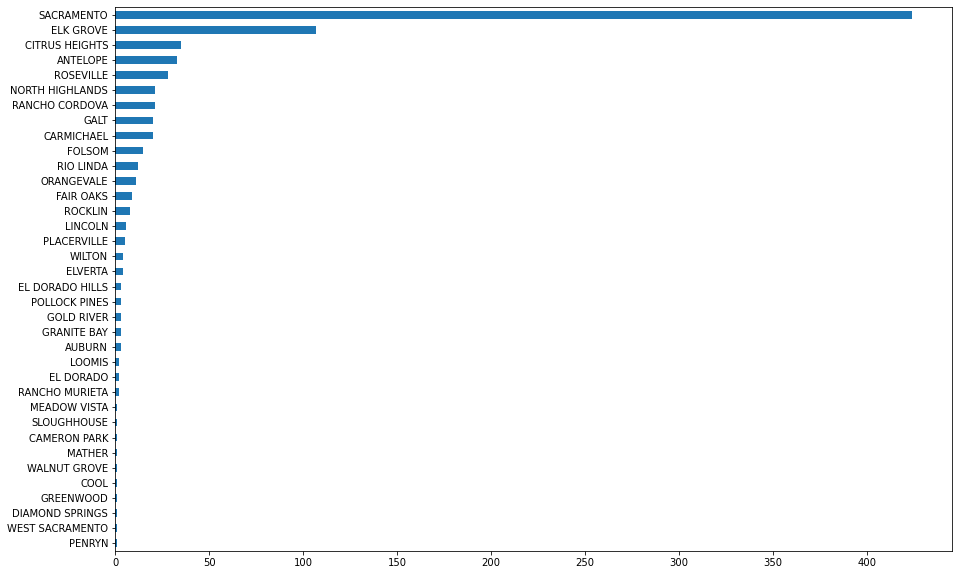

In [8]:
# City
house1['city'].value_counts().sort_values().plot(kind='barh', figsize=(15,10));

In [70]:
house1['type'].value_counts()

Residential     759
Condo            42
Multi-Family     13
Name: type, dtype: int64

In [63]:
# To check minimun and maximum value of all columns defining a function
def check_min_max(df):
    # Check min, max of each column
    print(df.describe().T[['min', 'max']])

In [71]:
check_min_max(house1)

                    min            max
zip        95603.000000   95864.000000
beds           1.000000       8.000000
baths          1.000000       5.000000
sq__ft       484.000000    5822.000000
price       2000.000000  884790.000000
latitude      38.241514      39.008159
longitude   -121.550527    -120.597599


In [9]:
# import the library
import folium
import pandas as pd

# Make an empty map
# 37.76, -122.45 is the initital location of SF, USA
sf_location = [37.76, -122.45]
m = generateBaseMap(default_location=sf_location)


# I can add circle/marker one by one on the map
for i in range(0, len(data.head(1000))):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']]
    ).add_to(m)
    
display(m)

NameError: name 'generateBaseMap' is not defined

In [ ]:
m = folium.Map(location=[38.575764, -121.478851], tiles="Mapbox Bright", zoom_start=10)

In [ ]:
# ANSWER

# Make an empty map
sf_location = [37.76, -122.45]
m = generateBaseMap(default_location=sf_location)

# I can add marker one by one on the map
for i in range(0, len(crimedata.head(100))):
    folium.Marker(location=[crimedata.iloc[i]['Y'], crimedata.iloc[i]['X']], popup=crimedata.iloc[i]['Category']).add_to(m)

# Show the map
m

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

In [31]:
# ANSWER
# Price is the target or outcome varibale since it is dependent on the features (precitors).

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [32]:
# ANSWER
'beds'
'baths'
'sq__ft'
'type'
'zip'

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [35]:
house2 = house1[['beds', 'baths', 'sq__ft', 'price', 'type','zip']]
house2

,beds,baths,sq__ft,price,type,zip
0,2,1,836,59222,Residential,95838
1,3,1,1167,68212,Residential,95823
2,2,1,796,68880,Residential,95815
3,2,1,852,69307,Residential,95815
4,2,1,797,81900,Residential,95824
...,...,...,...,...,...,...
980,4,3,2280,232425,Residential,95829
981,3,2,1477,234000,Residential,95823
982,3,2,1216,235000,Residential,95610
983,4,2,1685,235301,Residential,95758


In [34]:
# ANSWER
house2.corr()

,beds,baths,sq__ft,price,zip
beds,1.000000,0.654746,0.695710,0.441988,-0.072673
baths,0.654746,1.000000,0.724631,0.501820,-0.103332
sq__ft,0.695710,0.724631,1.000000,0.693708,-0.101560
price,0.441988,0.501820,0.693708,1.000000,-0.219591
zip,-0.072673,-0.103332,-0.101560,-0.219591,1.000000


In [36]:
### sq__ft is the best predictor, has the highest positive correlation with price (0.6937)
### sq__ft got strong positive relationship with beds (+0.6957) and baths (+0.7246)

In [16]:
# Target variable
Y = house2['price']

In [18]:
# Predictor variable
X = house2['beds']

In [19]:
def draw_scatter_plot (X,Y):
    ### Plot the data
    # Create a figure
    fig = plt.figure(figsize =(15,7))
    # get the axis of the figure
    ax = plt.gca()
    
    # plot a scatter plot with house data
    ax.scatter(X, Y, c='b')
    plt.show();

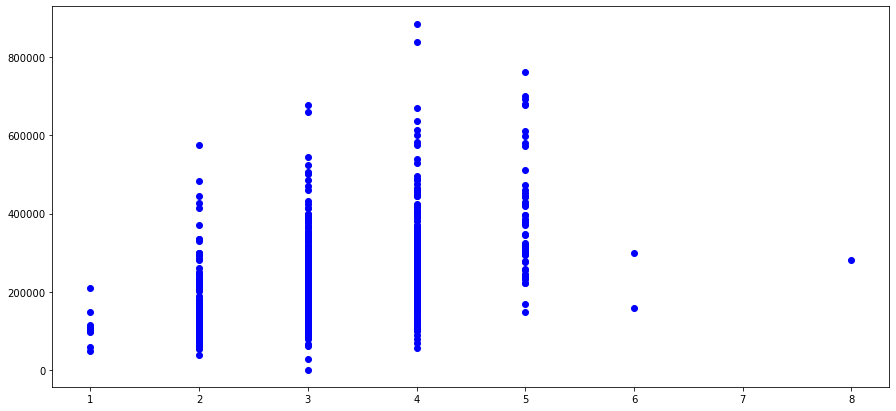

In [22]:
# beds
draw_scatter_plot(house2['beds'], house2['price'])

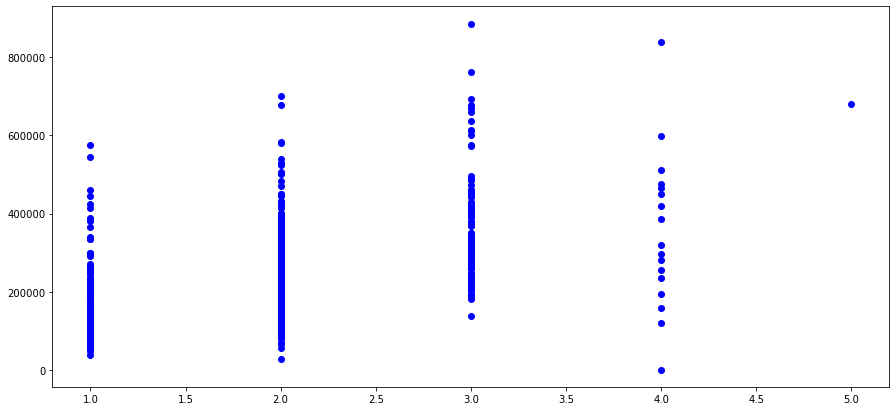

In [23]:
# baths
draw_scatter_plot(house2['baths'], house2['price'])

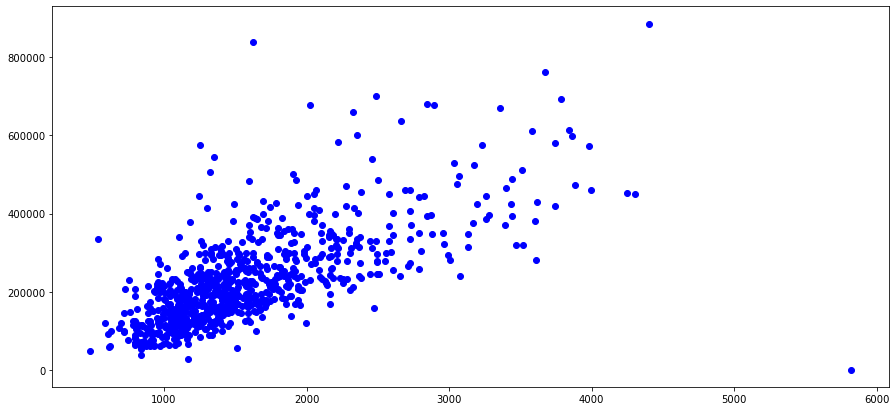

In [24]:
# sq__ft
draw_scatter_plot(house2['sq__ft'], house2['price'])

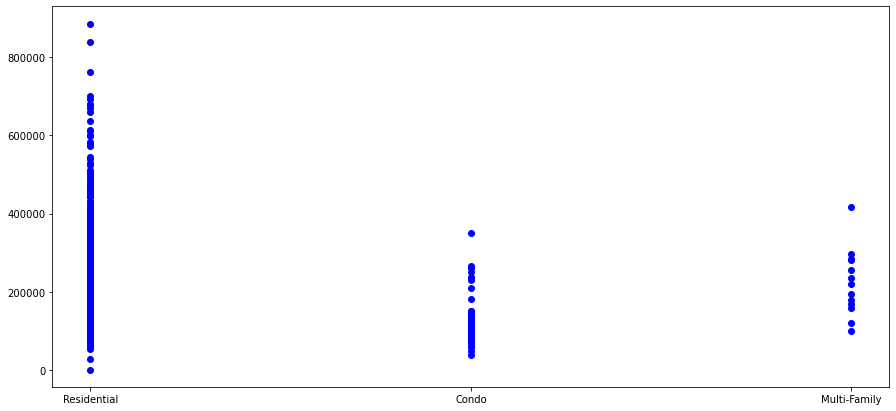

In [25]:
# type
draw_scatter_plot(house2['type'], house2['price'])

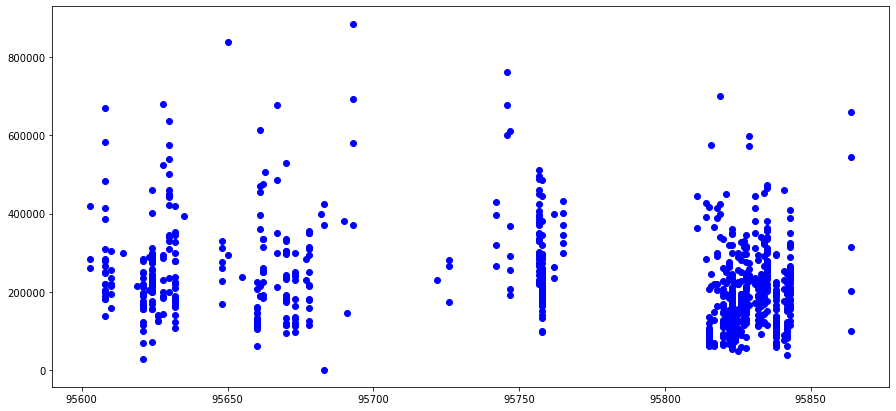

In [29]:
# zip
draw_scatter_plot(house2['zip'], house2['price'])

(array([1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8')])

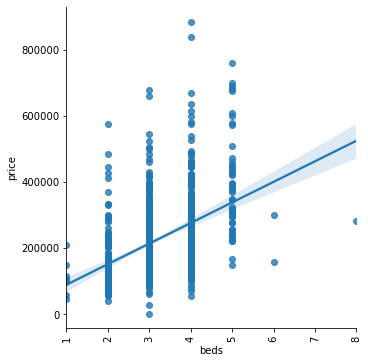

In [67]:
#Scatter plot using seaborn and lmplot(). fit_reg = False
sns.lmplot(x='beds', y= 'price', data= house2, fit_reg = True)
plt.xticks(rotation=90, fontsize="10")

(array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 [Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5'),
  Text(5.0, 0, '5.0')])

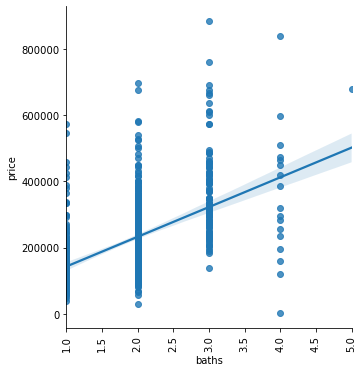

In [68]:
#Scatter plot using seaborn and lmplot(). fit_reg = False
sns.lmplot(x='baths', y= 'price', data= house2, fit_reg = True)
plt.xticks(rotation=90, fontsize="10")

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [37]:
from sklearn.linear_model import LinearRegression

In [39]:
# Linear regression for sq__ft
X = house2['sq__ft'].values.reshape(-1,1)
Y = house2['price']

linreg = LinearRegression()
linreg.fit(X, Y)

print(linreg.coef_, linreg.intercept_)

[125.21648668] 30210.633866919146


In [ ]:
# The linreg.coef (beta1) is the slope = how much the dependent variable (price) is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when the independent variable (sq__ft) increases by one.

# The linreg.intercept (beta0) corresponds to the value where the regression line cuts the y-axis= (constant, refer to a value of Y when X=0) is the expected vakue of Y (price) when all X (sq__ft) are equal to zero. 
# The intercept is the expected mean value of Y at that value


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0.0, 0, '0'),
  Text(1000.0, 0, '1000'),
  Text(2000.0, 0, '2000'),
  Text(3000.0, 0, '3000'),
  Text(4000.0, 0, '4000'),
  Text(5000.0, 0, '5000'),
  Text(6000.0, 0, '6000')])

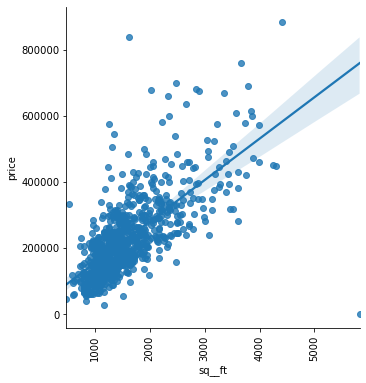

In [65]:
#Scatter plot using seaborn and lmplot(). fit_reg = False
sns.lmplot(x='sq__ft', y= 'price', data= house2, fit_reg = True)
plt.xticks(rotation=90, fontsize="10")

##### 2.4.1 Fit predictor and target variables using linear regression 

##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [69]:
# R=squared: how well the regression model fits the observed data. Generally, a higher r-squared indicates a better fit for the model.
# In this example, an r-squared of 25% reveals that 25% of the data fit the regression model. 
linreg.score(X, Y)

0.2504706292296305

### 3. Splitting Data

In [52]:
from sklearn.model_selection import train_test_split

#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [70]:
# ANSWER
## Create training and testing subsets## Create training and testing subsets

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [71]:
# ANSWER
## Check training data
print('X_train is a %s' % type(X_train))
print('X_train has %d rows', X_train.shape[0])
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_train[:10])

print('')
print('y_train is a %s' % type(y_train))
print('y_train has %d rows', y_train.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_train[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows 545

Sample of X_train__________________________________________________
[[3]
 [2]
 [1]
 [2]
 [1]
 [3]
 [2]
 [2]
 [1]
 [3]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (545,)

Sample of y_train__________________________________________________
779    300000
333    699000
18     120000
710    220000
916    165000
84     236685
61     182750
523    400000
339     65000
729    240000
Name: price, dtype: int64


In [72]:
## Check training/test data

# About test
print('X_train is a %s' % type(X_test))
print('X_train has %d rows', X_test.shape)
print('')
print('Sample of X_train%s' % ('_'*50))
print(X_test[:10])

print('')
print('y_train is a %s' % type(y_test))
print('y_train has %d rows', y_test.shape)
print('')
print('Sample of y_train%s' % ('_'*50))
print(y_test[:10])

X_train is a <class 'numpy.ndarray'>
X_train has %d rows (269, 1)

Sample of X_train__________________________________________________
[[2]
 [1]
 [1]
 [4]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]]

y_train is a <class 'pandas.core.series.Series'>
y_train has %d rows (269,)

Sample of y_train__________________________________________________
273    292000
708    215000
247    236250
334    839000
654    165000
969    223000
212    176250
337     61500
491    299940
467    258000
Name: price, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [76]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_, linreg.intercept_)

[90751.78922274] 55867.401164530864


In [77]:
linreg.score(X_test, y_test)

0.23464000403417995

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [ ]:
beds =3
baths = 2
sq__ft = 1204

In [79]:
# ANSWER
linreg.intercept_, linreg.coef_

(55867.401164530864, array([90751.78922274]))

In [80]:
beta0 = linreg.intercept_
beta1 = linreg.coef_
x = 1204

Ypred = beta1 * x + beta0
print('Predicted house price: ', Ypred[0])

Predicted house price:  109321021.62534751


In [81]:
# ANSWER
x = [[1204]]
Ypred = linreg.predict(x)
print('Predicted house price: ', Ypred[0])

Predicted house price:  109321021.62534751


#### Find the error

In [ ]:
# Predict price from X_test

In [82]:
y_preds = linreg.predict(X_test)

y_preds[:10]

array([237370.97961002, 146619.19038727, 146619.19038727, 418874.5580555 ,
       237370.97961002, 237370.97961002, 237370.97961002, 146619.19038727,
       237370.97961002, 237370.97961002])

In [83]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds, squared=True)

9550572451.666948



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



